In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import fmin_tnc

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

==================== Load Data ====================

In [3]:
data = pd.read_table('data\\week3\\ex2data1.txt', sep=',', header=None, names=['X_col1', 'X_col2', 'Y_col3'], dtype={'X_col1': np.float64, 'X_col2': np.float64, 'Y_col3': np.uint8})

In [4]:
data.head()

,X_col1,X_col2,Y_col3
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
X = data.loc[:, ['X_col1', 'X_col2']].to_numpy()

In [6]:
y = data.loc[:, 'Y_col3'].to_numpy()

==================== Part 1: Plotting ====================

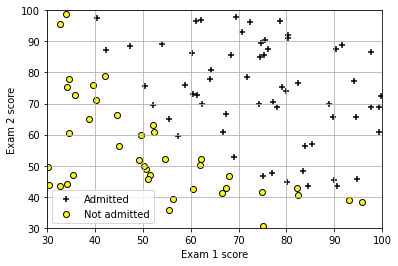

In [7]:
fig, ax = plt.subplots()

ax.scatter(np.take(X[:, 0], np.argwhere(y==1)), np.take(X[:, 1], np.argwhere(y==1)), c='black', marker='+', label='Admitted')
ax.scatter(np.take(X[:, 0], np.argwhere(y==0)), np.take(X[:, 1], np.argwhere(y==0)), c='yellow', marker='o', facecolors='none', edgecolors='black', label='Not admitted')
ax.set_xlabel('Exam 1 score', size=10)
ax.set_ylabel('Exam 2 score', size=10)
ax.grid(True)
ax.legend(fontsize=10)
ax.set_xlim([30, 100])
ax.set_ylim([30, 100])

plt.show()

============ Part 2: Compute Cost and Gradient ============

In [8]:
# 1 / (1 + exp(-h))
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z)) 

In [9]:
def costFunction(theta, X, y):
    theta = theta.reshape(theta.size, 1)
    hypo = sigmoid(np.matmul(X, theta))
    
    J = (1.0 / y.size) * (np.matmul(-1.0 * y.T, np.log(hypo)) - np.matmul((1.0 - y.T), np.log(1.0 - hypo)))
    grad = (1.0 / y.size) * np.matmul((hypo - y).T, X)
    
    return J.item(), grad.T.flatten()

In [10]:
initial_theta = np.zeros((X.shape[1] + 1,), dtype=np.float64)

In [11]:
X1 = np.hstack((np.ones((X.shape[0], 1), dtype=np.float64), X))

In [12]:
cost, grad = costFunction(initial_theta, X1, y.reshape(y.size, 1))

In [13]:
print('Cost at initial theta (zeros): {:.6f}\nExpected cost (approx): 0.693'.format(cost))
print('Gradient at initial theta (zeros): \n {}'.format('\n '.join('{:.6f}'.format(item) for item in grad)))
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros): 
 -0.100000
 -12.009217
 -11.262842
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



In [14]:
test_theta = np.array([-24, 0.2, 0.2], dtype=np.float64)

In [15]:
cost, grad = costFunction(test_theta, X1, y.reshape(y.size, 1))

In [16]:
print('Cost at test theta: {:.6f}\nExpected cost (approx): 0.218'.format(cost))
print('Gradient at test theta: \n {}'.format('\n '.join('{:.6f}'.format(item) for item in grad)))
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')

Cost at test theta: 0.218330
Expected cost (approx): 0.218
Gradient at test theta: 
 0.042903
 2.566234
 2.646797
Expected gradients (approx):
 0.043
 2.566
 2.647



============= Part 3: Optimizing using fminunc  =============

In [17]:
minimization = fmin_tnc(func=costFunction, x0=initial_theta, args=(X1, y.reshape(y.size, 1)))

In [18]:
cost, grad = costFunction(minimization[0], X1, y.reshape(y.size, 1))

In [19]:
print('Cost at theta found by fmin_tnc: {:.6f}\nExpected cost (approx): 0.203'.format(cost))
print('theta: \n {}'.format('\n '.join('{:.6f}'.format(item) for item in minimization[0])))
print('Expected theta (approx):\n -25.161\n 0.206\n 0.201\n')

Cost at theta found by fmin_tnc: 0.203498
Expected cost (approx): 0.203
theta: 
 -25.161319
 0.206232
 0.201471
Expected theta (approx):
 -25.161
 0.206
 0.201



In [20]:
plot_X = np.array([np.min(X1[:, 1]) - 2, np.max(X1[:, 1]) + 2], dtype=np.float64)

In [21]:
plot_Y = (-1.0 / minimization[0][2]) * (minimization[0][1] * plot_X + minimization[0][0])

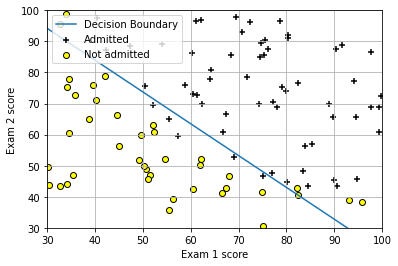

In [22]:
fig, ax = plt.subplots()

ax.scatter(np.take(X1[:, 1], np.argwhere(y==1)), np.take(X1[:, 2], np.argwhere(y==1)), c='black', marker='+', label='Admitted')
ax.scatter(np.take(X1[:, 1], np.argwhere(y==0)), np.take(X1[:, 2], np.argwhere(y==0)), c='yellow', marker='o', facecolors='none', edgecolors='black', label='Not admitted')
ax.plot(plot_X, plot_Y, label='Decision Boundary')
ax.set_xlabel('Exam 1 score', size=10)
ax.set_ylabel('Exam 2 score', size=10)
ax.grid(True)
ax.legend(fontsize=10)
ax.set_xlim([30, 100])
ax.set_ylim([30, 100])

plt.show()

============== Part 4: Predict and Accuracies ==============

In [23]:
prob = sigmoid(np.matmul(np.array([1, 45, 85], dtype=np.float64), minimization[0]))

In [24]:
print('For a student with scores 45 and 85, we predict an admission probability of {:.6f}\nExpected value: 0.775 +/- 0.002'.format(prob))

For a student with scores 45 and 85, we predict an admission probability of 0.776291
Expected value: 0.775 +/- 0.002


In [25]:
def predict(theta, X):
    return sigmoid(np.matmul(X, theta)).round()

In [26]:
p = predict(minimization[0], X1)

In [27]:
print('Train Accuracy: {:.6f}\nExpected accuracy (approx): 89.0'.format(np.mean((p==y).astype(np.float64)) * 100))

Train Accuracy: 89.000000
Expected accuracy (approx): 89.0
